In [1]:
# Dependencies
import json
import requests
from bs4 import BeautifulSoup as bs
import pymongo

In [2]:
# Initialize PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [3]:
# Define database and collection
db = client.etl_project_db
collection = db.oc_data

In [175]:
# URL of page to be scraped
# Orange County: https://data-ocpw.opendata.arcgis.com/datasets/d625d46014c44e68a483ab0e74be2aa2_7/data
url_oc = 'https://opendata.arcgis.com/datasets/d625d46014c44e68a483ab0e74be2aa2_7.geojson'

# Los Angeles: https://data.lacity.org/dataset/2010-Census-Populations-by-Zip-Code/nxs9-385f/data
url_la = 'https://data.lacity.org/resource/nxs9-385f.json'

url_oc_city_data = 'https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=06059'
url_oc_city_data2 = 'https://www.zip-codes.com/state/ca.asp'
url_oc_city_data3 = 'https://www.zip-codes.com/county/ca-orange.asp'



<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">

<html><head>
<title>Listing of all Zip Codes in the state of California</title>
<meta content="List of all Zip Codes for the state of California, CA. Includes all counties and cities in California." name="description"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="en-us" http-equiv="content-language"/>
<meta content="index,follow" name="robots"/>
<link href="https://www.zip-codes.com/state/ca.asp" rel="canonical"/>
<link href="https://www.zip-codes.com/m/state/ca.asp" media="only screen and (max-width: 640px)" rel="alternate"/>
<script async="" src="https://www.zip-codes.com/m/theme/ga/local-analytics.js"></script><script> window.dataLayer = window.dataLayer || [];function gtag(){dataLayer.push(arguments);}gtag('js', new Date());gtag('config', 'UA-23873959-1');</script><script async="async" src="https://www.googletagservices.com/tag/js/gpt.js"></script>
<script>
  var googletag = go
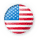

In [176]:
# Retrieve page with the requests module
response = requests.get(url_oc).json()
response_oc_city = requests.get(url_oc_city_data2)

# Create BeautifulSoup object; parse with 'lxml'
soup = bs(response_oc_city.text, 'html.parser')
print(soup)

In [6]:
for i in range(len(response['features'])):
    zipcode = response['features'][i]["properties"]["GEOID10"]
    total_population = response['features'][i]["properties"]["DP0010001"]
    male_population = response['features'][i]["properties"]["DP0010020"]
    female_population = response['features'][i]["properties"]["DP0010039"]
    total_household = response['features'][i]["properties"]["DP0130001"]
    
    post = {
        'zipcode':zipcode,
        'total_population':total_population,
        'male_population':male_population,
        'female_population':female_population,
        'total_household':total_household
    }
    
    # Dictionary to be inserted as a MongoDB document
    collection.insert_one(post)

In [7]:
# Display items in MongoDB collection
oc_data = db.oc_data.find()

for data in oc_data:
    print(data)

{'_id': ObjectId('5dcccbcf26aec451d00c337d'), 'zipcode': '90620', 'total_population': 45113, 'male_population': 22241, 'female_population': 22872, 'total_household': 13268}
{'_id': ObjectId('5dcccbcf26aec451d00c337e'), 'zipcode': '90621', 'total_population': 35153, 'male_population': 17377, 'female_population': 17776, 'total_household': 10304}
{'_id': ObjectId('5dcccbcf26aec451d00c337f'), 'zipcode': '90623', 'total_population': 15554, 'male_population': 7516, 'female_population': 8038, 'total_household': 5072}
{'_id': ObjectId('5dcccbcf26aec451d00c3380'), 'zipcode': '90630', 'total_population': 47993, 'male_population': 23204, 'female_population': 24789, 'total_household': 15785}
{'_id': ObjectId('5dcccbcf26aec451d00c3381'), 'zipcode': '90631', 'total_population': 67619, 'male_population': 33320, 'female_population': 34299, 'total_household': 21452}
{'_id': ObjectId('5dcccbcf26aec451d00c3382'), 'zipcode': '90680', 'total_population': 29945, 'male_population': 14811, 'female_population'

In [14]:
# Examine the results, then determine element that contains sought info
# results are returned as an iterable list
results = soup.find_all('tr')

print(results)


[<tr>
<td valign="top" width="195"><div class="side" id="side">
<div class="box"><div class="hd">Our Products</div><div class="cn">• <a href="/zip-code-database.asp" title="US ZIP Code Database">US ZIP Code Database</a><br/>• <a href="/zip-plus-4-database.asp" title="US ZIP Code Database">US ZIP+4 Database</a><br/>• <a href="/2010-census-database.asp" title="2010 Census Multi Level Database">2010 Census Database</a><br/>• <a href="/canadian-postal-code-database.asp" title="Canadian Database">Canadian Postal Codes</a><br/>• <a href="/map-boundary-data.asp" title="ZIP Code Boundary Data">ZIP Code Boundary Data</a><br/>• <a href="/zip-code-api.asp" title="ZIP Code API">ZIP Code API</a><span class="new"> NEW!</span><br/>• <a href="/area-code-database.asp" title="Area Code Database">Area Code Database</a><br/>• <a href="/zip-code-historical-database.asp" title="Historical Zip Codes">Historical Zip Codes</a><br/>• <a href="/zip-code-radius-app.asp" title="FREE Radius Application">FREE Radius

In [13]:
for result in results:
    if result.find('a'):
        print(result.find_all('a')[0].text)
        print(result.find_all('a')[1].text)


Canadian Postal Codes
ZIP Code Boundary Data
Share



IndexError: list index out of range

In [109]:
# Examine the results, then determine element that contains sought info
# results are returned as an iterable list
results = soup.find_all('td',class_="label")

print(results)

[<td class="label"><strong>ZIP Code</strong></td>, <td class="label"><a href="/zip-code/90620/zip-code-90620.asp" style="text-decoration:underline;" title="ZIP Code 90620, BUENA PARK, CA">ZIP Code 90620</a></td>, <td class="label"><a href="/zip-code/90621/zip-code-90621.asp" style="text-decoration:underline;" title="ZIP Code 90621, BUENA PARK, CA">ZIP Code 90621</a></td>, <td class="label"><a href="/zip-code/90622/zip-code-90622.asp" style="text-decoration:underline;" title="ZIP Code 90622, BUENA PARK, CA">ZIP Code 90622</a></td>, <td class="label"><a href="/zip-code/90623/zip-code-90623.asp" style="text-decoration:underline;" title="ZIP Code 90623, LA PALMA, CA">ZIP Code 90623</a></td>, <td class="label"><a href="/zip-code/90624/zip-code-90624.asp" style="text-decoration:underline;" title="ZIP Code 90624, BUENA PARK, CA">ZIP Code 90624</a></td>, <td class="label"><a href="/zip-code/90630/zip-code-90630.asp" style="text-decoration:underline;" title="ZIP Code 90630, CYPRESS, CA">ZIP Cod

In [76]:
for result in results:
    if result.find('a'):
        print(result.find_all('a')[0].text.strip('ZIP Code '))

90620
90621
90622
90623
90624
90630
90631
90632
90633
90680
90720
90721
90740
90742
90743
92602
92603
92604
92605
92606
92607
92609
92610
92612
92614
92615
92616
92617
92618
92619
92620
92623
92624
92625
92626
92627
92628
92629
92630
92637
92646
92647
92648
92649
92650
92651
92652
92653
92654
92655
92656
92657
92658
92659
92660
92661
92662
92663
92672
92673
92674
92675
92676
92677
92678
92679
92683
92684
92685
92688
92690
92691
92692
92693
92694
92697
92698
92701
92702
92703
92704
92705
92706
92707
92708
92711
92712
92728
92735
92780
92781
92782
92799
92801
92802
92803
92804
92805
92806
92807
92808
92809
92811
92812
92814
92815
92816
92817
92821
92822
92823
92825
92831
92832
92833
92834
92835
92836
92837
92838
92840
92841
92842
92843
92844
92845
92846
92850
92856
92857
92859
92861
92862
92863
92864
92865
92866
92867
92868
92869
92870
92871
92885
92886
92887
92899


In [111]:
results2 = soup.find_all('td',class_="info")
print(results2)

[<td class="info"><strong>Classification</strong></td>, <td class="info"><strong>City</strong></td>, <td class="info"><strong>Population</strong></td>, <td class="info"><strong>Timezone</strong></td>, <td class="info"><strong>Area Code(s)</strong></td>, <td class="info">General</td>, <td class="info"><a href="/city/ca-buena-park.asp" title="Buena Park, CA">Buena Park</a></td>, <td class="info">45,113</td>, <td class="info">Pacific</td>, <td class="info">714/657</td>, <td class="info">General</td>, <td class="info"><a href="/city/ca-buena-park.asp" title="Buena Park, CA">Buena Park</a></td>, <td class="info">35,153</td>, <td class="info">Pacific</td>, <td class="info">714/657</td>, <td class="info">P.O. Box</td>, <td class="info"><a href="/city/ca-buena-park.asp" title="Buena Park, CA">Buena Park</a></td>, <td class="info">0</td>, <td class="info">Pacific</td>, <td class="info">714/657</td>, <td class="info">General</td>, <td class="info"><a href="/city/ca-la-palma.asp" title="La Palma,

In [114]:
for result in results2:
    if result.find('a'):
        print(result.find_all('a')[0].text)
        


Buena Park
Buena Park
Buena Park
La Palma
Buena Park
Cypress
La Habra
La Habra
La Habra
Stanton
Los Alamitos
Los Alamitos
Seal Beach
Sunset Beach
Surfside
Irvine
Irvine
Irvine
Huntington Beach
Irvine
Laguna Niguel
El Toro
Foothill Ranch
Irvine
Irvine
Huntington Beach
Irvine
Irvine
Irvine
Irvine
Irvine
Irvine
Capistrano Beach
Corona Del Mar
Costa Mesa
Costa Mesa
Costa Mesa
Dana Point
Lake Forest
Laguna Woods
Huntington Beach
Huntington Beach
Huntington Beach
Huntington Beach
East Irvine
Laguna Beach
Laguna Beach
Laguna Hills
Laguna Hills
Midway City
Aliso Viejo
Newport Coast
Newport Beach
Newport Beach
Newport Beach
Newport Beach
Newport Beach
Newport Beach
San Clemente
San Clemente
San Clemente
San Juan Capistrano
Silverado
Laguna Niguel
Trabuco Canyon
Trabuco Canyon
Westminster
Westminster
Westminster
Rancho Santa Margarita
Mission Viejo
Mission Viejo
Mission Viejo
San Juan Capistrano
Ladera Ranch
Irvine
Aliso Viejo
Santa Ana
Santa Ana
Santa Ana
Santa Ana
Santa Ana
Santa Ana
Santa Ana

In [177]:
# Examine the results, then determine element that contains sought info
# results are returned as an iterable list
results = soup.find_all('tr')

print(results)

[<tr>
<td valign="top" width="195"><div class="side" id="side">
<div class="box"><div class="hd">Our Products</div><div class="cn">• <a href="/zip-code-database.asp" title="US ZIP Code Database">US ZIP Code Database</a><br/>• <a href="/zip-plus-4-database.asp" title="US ZIP Code Database">US ZIP+4 Database</a><br/>• <a href="/2010-census-database.asp" title="2010 Census Multi Level Database">2010 Census Database</a><br/>• <a href="/canadian-postal-code-database.asp" title="Canadian Database">Canadian Postal Codes</a><br/>• <a href="/map-boundary-data.asp" title="ZIP Code Boundary Data">ZIP Code Boundary Data</a><br/>• <a href="/zip-code-api.asp" title="ZIP Code API">ZIP Code API</a><span class="new"> NEW!</span><br/>• <a href="/area-code-database.asp" title="Area Code Database">Area Code Database</a><br/>• <a href="/zip-code-historical-database.asp" title="Historical Zip Codes">Historical Zip Codes</a><br/>• <a href="/zip-code-radius-app.asp" title="FREE Radius Application">FREE Radius

In [178]:
row_num = 0
for result in results:
    if row_num>0:
        if result.find('td',class_="label"):
            if result.find('a'):
                print(result.find_all('a')[0].text.strip('ZIP Code '))
        if result.find('td',class_="info"):
            if result.find('a'):
                print(result.find_all('a')[1].text)
    row_num = row_num + 1


In [188]:
for result in results:
    if result.find('td'):
        if result.find('a'):
            print(result.find_all('a')[0].text.strip('ZIP Code '))


US ZIP Code Databas
More Details
90001
90002
90003
90004
90005
90006
90007
90008
90009
90010
90011
90012
90013
90014
90015
90016
90017
90018
90019
90020
90021
90022
90023
90024
90025
90026
90027
90028
90029
90030
90031
90032
90033
90034
90035
90036
90037
90038
90039
90040
90041
90042
90043
90044
90045
90046
90047
90048
90049
90050
90051
90052
90053
90054
90055
90056
90057
90058
90059
90060
90061
90062
90063
90064
90065
90066
90067
90068
90069
90070
90071
90072
90073
90074
90075
90076
90077
90078
90079
90080
90081
90082
90083
90084
90086
90087
90088
90089
90090
90091
90093
90094
90095
90096
90099
90134
90189
90201
90202
90209
90210
90211
90212
90213
90220
90221
90222
90223
90224
90230
90231
90232
90233
90239
90240
90241
90242
90245
90247
90248
90249
90250
90251
90254
90255
90260
90261
90262
90263
90264
90265
90266
90267
90270
90272
90274
90275
90277
90278
90280
90290
90291
90292
90293
90294
90295
90296
90301
90302
90303
90304
90305
90306
90307
90308
90309
90310
90311
90312
90401
90402
9

94163
94164
94172
94177
94188
94203
94204
94205
94206
94207
94208
94209
94211
94229
94230
94232
94234
94235
94236
94237
94239
94240
94244
94245
94247
94248
94249
94250
94252
94254
94256
94257
94258
94259
94261
94262
94263
94267
94268
94269
94271
94273
94274
94277
94278
94279
94280
94282
94283
94284
94285
94287
94288
94289
94290
94291
94293
94294
94295
94296
94297
94298
94299
94301
94302
94303
94304
94305
94306
94309
94401
94402
94403
94404
94497
94501
94502
94503
94505
94506
94507
94508
94509
94510
94511
94512
94513
94514
94515
94516
94517
94518
94519
94520
94521
94522
94523
94524
94525
94526
94527
94528
94529
94530
94531
94533
94534
94535
94536
94537
94538
94539
94540
94541
94542
94543
94544
94545
94546
94547
94548
94549
94550
94551
94552
94553
94555
94556
94557
94558
94559
94560
94561
94562
94563
94564
94565
94566
94567
94568
94569
94570
94571
94572
94573
94574
94575
94576
94577
94578
94579
94580
94581
94582
94583
94585
94586
94587
94588
94589
94590
94591
94592
94595
94596
94597
9459

In [212]:
row_num = 0
for result in results:
    if result.find('td'):
         if result.find_all('a'):
            if row_num>1:
                print(result.find_all('a')[0].text.strip('ZIP Code '))
                print(result.find_all('a')[1].text)
            row_num = row_num + 1


90001
Los Angeles
90002
Los Angeles
90003
Los Angeles
90004
Los Angeles
90005
Los Angeles
90006
Los Angeles
90007
Los Angeles
90008
Los Angeles
90009
Los Angeles
90010
Los Angeles
90011
Los Angeles
90012
Los Angeles
90013
Los Angeles
90014
Los Angeles
90015
Los Angeles
90016
Los Angeles
90017
Los Angeles
90018
Los Angeles
90019
Los Angeles
90020
Los Angeles
90021
Los Angeles
90022
Los Angeles
90023
Los Angeles
90024
Los Angeles
90025
Los Angeles
90026
Los Angeles
90027
Los Angeles
90028
Los Angeles
90029
Los Angeles
90030
Los Angeles
90031
Los Angeles
90032
Los Angeles
90033
Los Angeles
90034
Los Angeles
90035
Los Angeles
90036
Los Angeles
90037
Los Angeles
90038
Los Angeles
90039
Los Angeles
90040
Los Angeles
90041
Los Angeles
90042
Los Angeles
90043
Los Angeles
90044
Los Angeles
90045
Los Angeles
90046
Los Angeles
90047
Los Angeles
90048
Los Angeles
90049
Los Angeles
90050
Los Angeles
90051
Los Angeles
90052
Los Angeles
90053
Los Angeles
90054
Los Angeles
90055
Los Angeles
90056
Los 

92655
Midway City
92656
Aliso Viejo
92657
Newport Coast
92658
Newport Beach
92659
Newport Beach
92660
Newport Beach
92661
Newport Beach
92662
Newport Beach
92663
Newport Beach
92672
San Clemente
92673
San Clemente
92674
San Clemente
92675
San Juan Capistrano
92676
Silverado
92677
Laguna Niguel
92678
Trabuco Canyon
92679
Trabuco Canyon
92683
Westminster
92684
Westminster
92685
Westminster
92688
Rancho Santa Margarita
92690
Mission Viejo
92691
Mission Viejo
92692
Mission Viejo
92693
San Juan Capistrano
92694
Ladera Ranch
92697
Irvine
92698
Aliso Viejo
92701
Santa Ana
92702
Santa Ana
92703
Santa Ana
92704
Santa Ana
92705
Santa Ana
92706
Santa Ana
92707
Santa Ana
92708
Fountain Valley
92711
Santa Ana
92712
Santa Ana
92728
Fountain Valley
92735
Santa Ana
92780
Tustin
92781
Tustin
92782
Tustin
92799
Santa Ana
92801
Anaheim
92802
Anaheim
92803
Anaheim
92804
Anaheim
92805
Anaheim
92806
Anaheim
92807
Anaheim
92808
Anaheim
92809
Anaheim
92811
Atwood
92812
Anaheim
92814
Anaheim
92815
Anaheim
9281

94933
Forest Knolls
94937
Inverness
94938
Lagunitas
94939
Larkspur
94940
Marshall
94941
Mill Valley
94942
Mill Valley
94945
Novato
94946
Nicasio
94947
Novato
94948
Novato
94949
Novato
94950
Olema
94951
Penngrove
94952
Petaluma
94953
Petaluma
94954
Petaluma
94955
Petaluma
94956
Point Reyes Station
94957
Ross
94960
San Anselmo
94963
San Geronimo
94964
San Quentin
94965
Sausalito
94966
Sausalito
94970
Stinson Beach
94971
Tomales
94972
Valley Ford
94973
Woodacre
94974
San Quentin
94975
Petaluma
94976
Corte Madera
94977
Larkspur
94978
Fairfax
94979
San Anselmo
94998
Novato
94999
Petaluma
95001
Aptos
95002
Alviso
95003
Aptos
95004
Aromas
95005
Ben Lomond
95006
Boulder Creek
95007
Brookdale
95008
Campbell
95009
Campbell
95010
Capitola
95011
Campbell
95012
Castroville
95013
Coyote
95014
Cupertino
95015
Cupertino
95017
Davenport
95018
Felton
95019
Freedom
95020
Gilroy
95021
Gilroy
95023
Hollister
95024
Hollister
95026
Holy City
95030
Los Gatos
95031
Los Gatos
95032
Los Gatos
95033
Los Gatos
950